In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

In [12]:
data = pd.read_excel("./data/OCR_verified.xlsx")

In [13]:
data.head()

,Erro,Nº DODF,DATA DODOF,COMPLEMENTO,Nº BLOCO,SEÇÃO,SEC,SUB_SEC1,SUB_SEC2,SUB_SEC3,...,Nº LINHAS,Nº LINHAS SECAO,Nº LINHAS SEC,Nº LINHAS SUB_SEC1,Nº LINHAS SUB_SEC2,Nº LINHAS SUB_SEC3,Nº LINHAS TIT BLOCO,Nº LINHAS SUBT BLOCO,Nº LINHAS DEMAIS SUBT BLOCO,Nº LINHAS TOTAIS
0,1.0,1.0,01-01-2019,EDICAO ESPECIAL,1.0,SEÇÃO II,PODER EXECUTIVO,NaN,NaN,NaN,...,88.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,91.0
1,1.0,1.0,02-01-2019,INTEGRA,1.0,SEÇÃO II,PODER EXECUTIVO,NaN,NaN,NaN,...,16.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,19.0
2,1.0,1.0,02-01-2019,INTEGRA,2.0,SEÇÃO III,"SECRETARIA DE ESTADO DE ECONOMIA, DESENVOLVIME...",COMPANHIA IMOBILIÁRIA DE BRASÍLIA,AGÊNCIA DE DESENVOLVIMENTO DO DISTRITO FEDERAL,COMISSÃO DE VENDA DIRETA,...,16.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0,25.0
3,1.0,1.0,02-01-2019,INTEGRA,3.0,SEÇÃO III,"SECRETARIA DE ESTADO DE ECONOMIA, DESENVOLVIME...",COMPANHIA IMOBILIÁRIA DE BRASÍLIA,AGÊNCIA DE DESENVOLVIMENTO DO DISTRITO FEDERAL,COMISSÃO DE VENDA DIRETA,...,28.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,30.0
4,1.0,1.0,02-01-2019,INTEGRA,4.0,SEÇÃO III,"SECRETARIA DE ESTADO DE ECONOMIA, DESENVOLVIME...",COMPANHIA IMOBILIÁRIA DE BRASÍLIA,AGÊNCIA DE DESENVOLVIMENTO DO DISTRITO FEDERAL,COMISSÃO DE VENDA DIRETA,...,52.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,54.0


In [9]:
data.columns

Index(['Erro', 'Nº DODF', 'DATA DODOF', 'COMPLEMENTO', 'Nº BLOCO', 'SEÇÃO',
       'SEC', 'SUB_SEC1', 'SUB_SEC2', 'SUB_SEC3', 'TIT BLOCO', 'SUBT BLOCO',
       'DEMAIS SUBT BLOCO', 'TEXTO BLOCO', 'INICIO BLOCO', 'FIM BLOCO',
       'PAG INICIO BLOCO', 'LINHA INICIO BLOCO', 'PAG FIM BLOCO',
       'LINHA FIM BLOCO', 'Nº LINHAS', 'Nº LINHAS SECAO', 'Nº LINHAS SEC',
       'Nº LINHAS  SUB_SEC1', 'Nº LINHAS SUB_SEC2', 'Nº LINHAS SUB_SEC3',
       'Nº LINHAS TIT BLOCO', 'Nº LINHAS SUBT BLOCO',
       'Nº LINHAS DEMAIS SUBT BLOCO', 'Nº LINHAS TOTAIS'],
      dtype='object')

In [15]:
data_clean = data[["Erro", "SEC", "TEXTO BLOCO", "Nº LINHAS TOTAIS"]]; data_clean.head()

,Erro,SEC,TEXTO BLOCO,Nº LINHAS TOTAIS
0,1.0,PODER EXECUTIVO,"O GOVERNADOR DO DISTRITO FEDERAL, NO USO DE SU...",91.0
1,1.0,PODER EXECUTIVO,"O GOVERNADOR DO DISTRITO FEDERAL, no uso das a...",19.0
2,1.0,"SECRETARIA DE ESTADO DE ECONOMIA, DESENVOLVIME...","O Presidente da COVED, acolhendo os pareceres ...",25.0
3,1.0,"SECRETARIA DE ESTADO DE ECONOMIA, DESENVOLVIME...","O Presidente da COVED, acolhendo o parecer ins...",30.0
4,1.0,"SECRETARIA DE ESTADO DE ECONOMIA, DESENVOLVIME...","O Presidente da COVED, acolhendo os pareceres ...",54.0


In [25]:
len(data[data["Erro"] == 1]) / len(data[data["Erro"] >= 1])

0.9084065244667503

In [26]:
data["Erro"].value_counts()

1.0    724
2.0     64
3.0      9
Name: Erro, dtype: int64

In [33]:
data["Nº LINHAS TOTAIS"].value_counts()

10.0      331
9.0       278
11.0      249
12.0      177
13.0      153
         ... 
528.0       1
236.0       1
244.0       1
98.0        1
2280.0      1
Name: Nº LINHAS TOTAIS, Length: 182, dtype: int64

In [36]:
data["Nº LINHAS TOTAIS"].describe()

count    2650.000000
mean       36.953585
std       154.633489
min         4.000000
25%        10.000000
50%        14.000000
75%        21.000000
max      3450.000000
Name: Nº LINHAS TOTAIS, dtype: float64

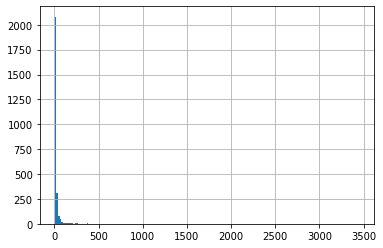

In [35]:
hist = data["Nº LINHAS TOTAIS"].hist(bins=182)

In [39]:
len(data["SEC"].unique())

40

In [40]:
data["SEC"].unique()

array(['PODER EXECUTIVO',
       'SECRETARIA DE ESTADO DE ECONOMIA, DESENVOLVIMENTO, INOVAÇÃO, CIÊNCIA E TECNOLOGIA',
       'SECRETARIA DE ESTADO DA CASA CIVIL, RELAÇÕES INSTITUCIONAIS E SOCIAIS',
       'SECRETARIA DE ESTADO DE EDUCAÇÃO',
       'SECRETARIA DE ESTADO DA SEGURANÇA PÚBLICA', 'PODER LEGISLATIVO',
       'SECRETARIA DE ESTADO DA CASA CIVIL',
       'SECRETARIA DE ESTADO DE SAÚDE',
       'SECRETARIA DE ESTADO DE TRANSPORTE E MOBILIDADE',
       'SECRETARIA DE ESTADO DE JUSTIÇA E CIDADANIA',
       'SECRETARIA DE ESTADO DE OBRAS E INFRAESTRUTURA',
       'SECRETARIA DE ESTADO DE TURISMO',
       'SECRETARIA DE ESTADO DE SEGURANÇA PÚBLICA',
       'DEFENSORIA PÚBLICA DO DISTRITO FEDERAL',
       'TRIBUNAL DE CONTAS DO DISTRITO FEDERAL',
       'SECRETARIA DE ESTADO DE FAZENDA, PLANEJAMENTO, ORÇAMENTO E GESTÃO',
       'SECRETARIA DE ESTADO DE AGRICULTURA, ABASTECIMENTO E DESENVOLVIMENTO RURAL',
       'SECRETARIA DE ESTADO DE DESENVOLVIMENTO URBANO E HABITAÇÃO',
       'CA

In [41]:
data["SEC"].value_counts()

SECRETARIA DE ESTADO DE SAÚDE                                                                              568
SECRETARIA DE ESTADO DE SEGURANÇA PÚBLICA                                                                  437
SECRETARIA DE ESTADO DE OBRAS E INFRAESTRUTURA                                                             236
SECRETARIA DE ESTADO DE FAZENDA, PLANEJAMENTO, ORÇAMENTO E GESTÃO                                          186
CASA CIVIL                                                                                                 164
SECRETARIA DE ESTADO DE CULTURA                                                                            157
SECRETARIA DE ESTADO DE TRANSPORTE E MOBILIDADE                                                            147
SECRETARIA DE ESTADO DE EDUCAÇÃO                                                                           124
TRIBUNAL DE CONTAS DO DISTRITO FEDERAL                                                                      74
P